# Homework 4

## Jacobi Function and Gauss-Seidel Function

In [4]:
import numpy as np

#Jacobi

def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        x = x_new
        
    return x, max_iterations


#Gauss-Seidel

def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    
    for k in range(max_iterations):
        x_new = x.copy()
        
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i)) # Using already updated values
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n)) # Using old values
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
            
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k
        
        x = x_new
    return x, max_iterations

## Call Functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

A = np.array([[3.0, -0.1, -0.2],
              [0.1, 7.0, -0.3],
              [0.3, -0.2, 10.0]], dtype=float)

b = np.array([7.85, -19.3, 71.4], dtype=float)

x0 = np.zeros(3, dtype=float)
tols = [1e-3, 1e-6, 1e-9]
max_iterations = 10000

def jacobi_error_history(A, b, x0, tol, max_iterations):
    x_old = x0.astype(float).copy()
    n = len(b)
    errs = []

    for k in range(max_iterations):
        x_new = np.zeros_like(x_old, dtype=float)

        for i in range(n):
            s = 0.0
            for j in range(n):
                if j != i:
                    s += A[i, j] * x_old[j]
            x_new[i] = (b[i] - s) / A[i, i]

        err = np.max(np.abs(x_new - x_old))
        errs.append(err)

        if err < tol:
            break

        x_old = x_new

    return errs

def gauss_seidel_error_history(A, b, x0, tol, max_iterations):
    x = x0.astype(float).copy()
    n = len(b)
    errs = []

    for k in range(max_iterations):
        x_old = x.copy()

        for i in range(n):
            s1 = 0.0
            for j in range(i):
                s1 += A[i, j] * x[j]

            s2 = 0.0
            for j in range(i + 1, n):
                s2 += A[i, j] * x_old[j]

            x[i] = (b[i] - s1 - s2) / A[i, i]

        err = np.max(np.abs(x - x_old))
        errs.append(err)

        if err < tol:
            break

    return errs

results = {}

## Loop for times

In [6]:
for tol in tols:
    
    start_j = time.perf_counter()
    x_jac, it_jac = jacobi(A, b, x0, tol, max_iterations)
    end_j = time.perf_counter()

    
    start_g = time.perf_counter()
    x_gs, it_gs = gauss_seidel(A, b, x0, tol, max_iterations)
    end_g = time.perf_counter()

   
    err_jac = jacobi_error_history(A, b, x0, tol, max_iterations)
    err_gs = gauss_seidel_error_history(A, b, x0, tol, max_iterations)

    results[tol] = {
        "jacobi": {"x": x_jac, "iters": it_jac, "errs": err_jac, "time": end_j - start_j},
        "gs": {"x": x_gs, "iters": it_gs, "errs": err_gs, "time": end_g - start_g}
    }

    print("Tolerance =", tol)
    print("  Jacobi:       iterations =", it_jac, " time =", end_j - start_j, " solution =", x_jac)
    print("  Gauss-Seidel: iterations =", it_gs,  " time =", end_g - start_g, " solution =", x_gs)
    print()

Tolerance = 0.001
  Jacobi:       iterations = 3  time = 0.0003418717533349991  solution = [ 3.0000225  -2.50000266  6.99998104]
  Gauss-Seidel: iterations = 3  time = 0.00021269358694553375  solution = [ 3.00000035 -2.50000004  6.99999999]

Tolerance = 1e-06
  Jacobi:       iterations = 6  time = 0.00034176744520664215  solution = [ 3.  -2.5  7. ]
  Gauss-Seidel: iterations = 4  time = 0.0002187006175518036  solution = [ 3.  -2.5  7. ]

Tolerance = 1e-09
  Jacobi:       iterations = 8  time = 0.00043093785643577576  solution = [ 3.  -2.5  7. ]
  Gauss-Seidel: iterations = 6  time = 0.00025286339223384857  solution = [ 3.  -2.5  7. ]



## Plot

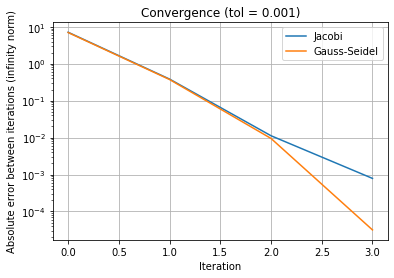

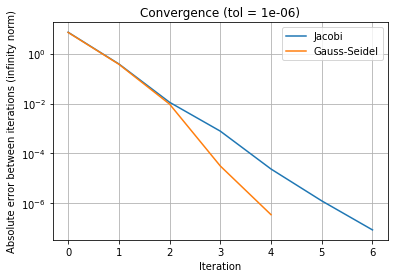

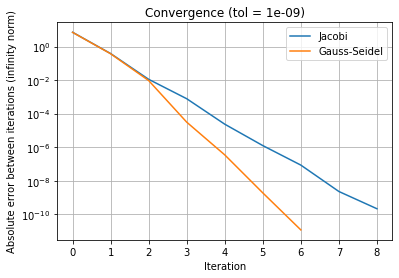

In [7]:
for tol in tols:
    plt.figure()
    plt.semilogy(results[tol]["jacobi"]["errs"], label="Jacobi")
    plt.semilogy(results[tol]["gs"]["errs"], label="Gauss-Seidel")
    plt.xlabel("Iteration")
    plt.ylabel("Absolute error between iterations (infinity norm)")
    plt.title("Convergence (tol = " + str(tol) + ")")
    plt.legend()
    plt.grid(True)
    plt.show()

## How does tolerance affect the number of iterations needed for convergance?

A smaller tolerence forces the method to be more accurate to stop, so it needs more iterations to converge. With larger tolerance, it becomes less strict, speeding up the process, but giving a less accurate final result.